Vehicle Detection

This will be used to create imagery for the writeup

In [85]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline
from scipy.ndimage.measurements import label

import vehicledetect

In [ ]:
1. Explain how (and identify where in your code) you extracted HOG features from the training images.

I started by reading in all the vehicle and non-vehicle images. Here is an example of one of each of the vehicle and non-vehicle classes:

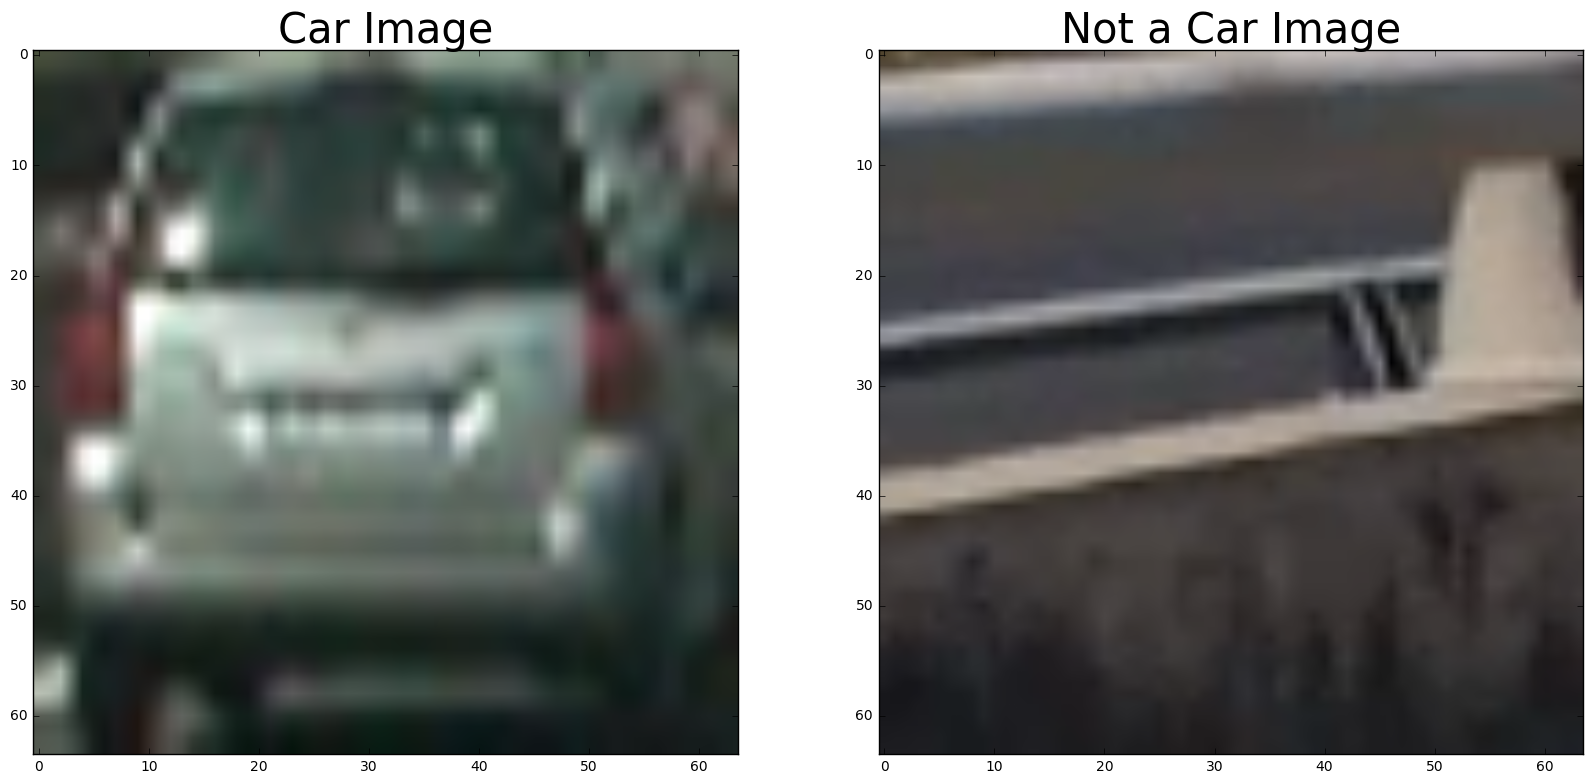

In [53]:
cars = glob.glob('vehicles/*/*.png')
notcars = glob.glob('non-vehicles/*/*.png')
car_img = mpimg.imread(cars[0])
notcar_img = mpimg.imread(notcars[0])
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(car_img)
ax1.set_title('Car Image', fontsize=30)
ax2.imshow(notcar_img)
ax2.set_title('Not a Car Image', fontsize=30)

(64, 64, 3)
YCrCb


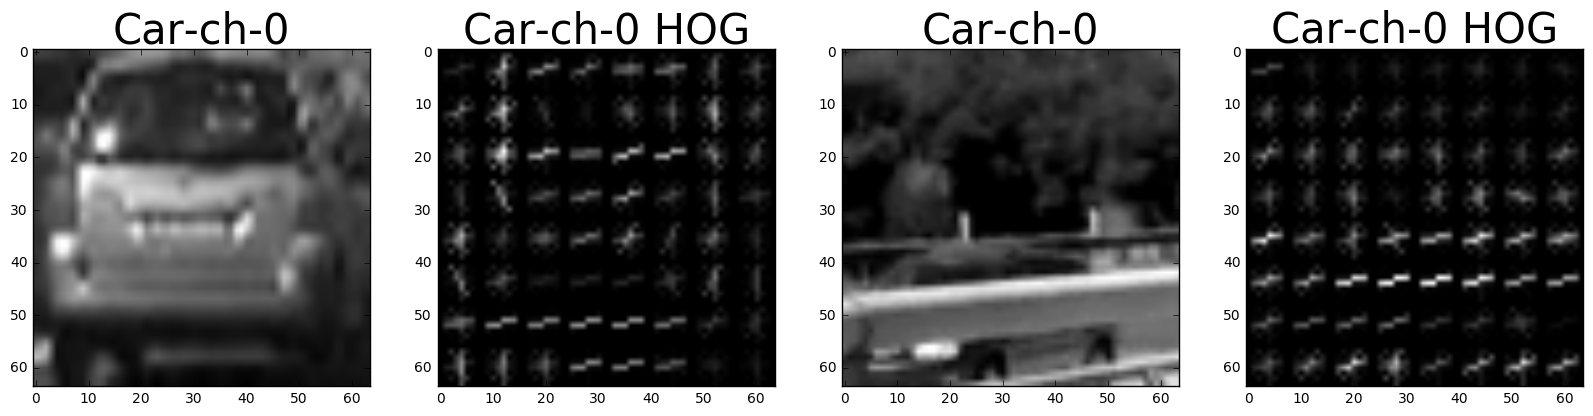

(64, 64, 3)
YCrCb


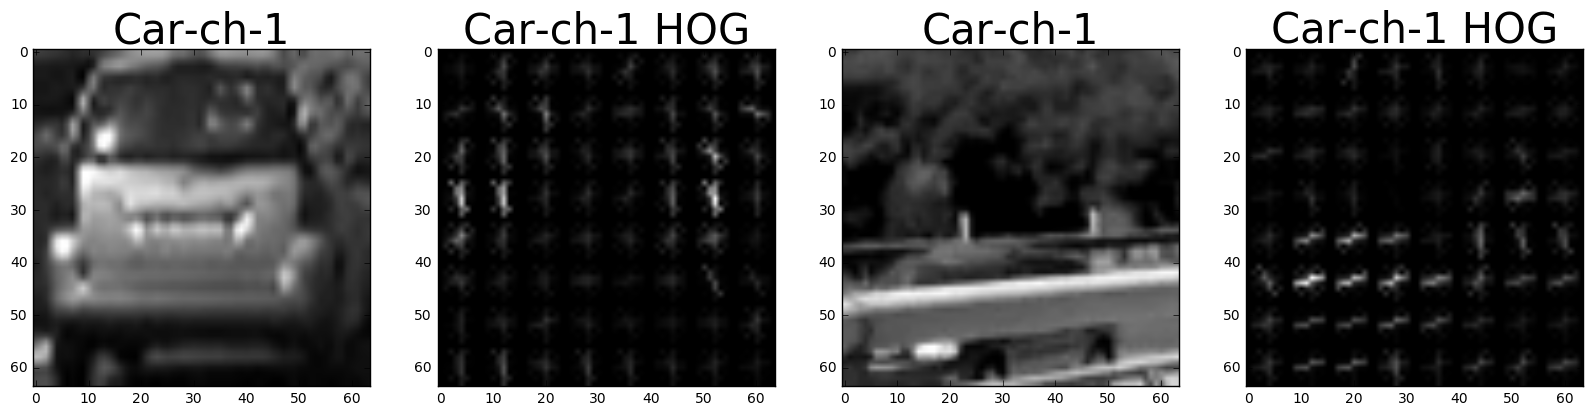

(64, 64, 3)
YCrCb


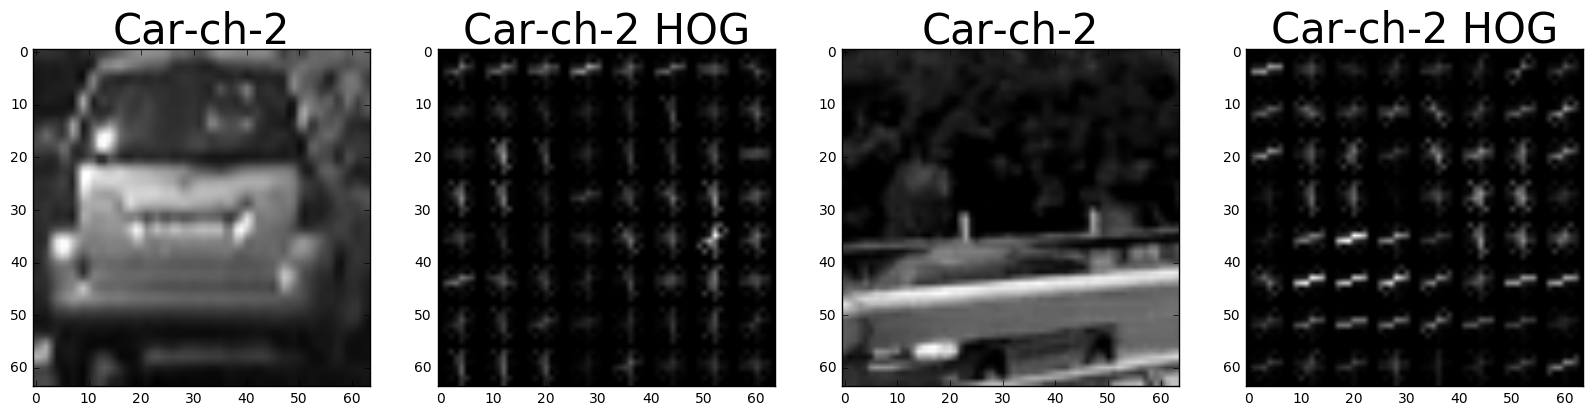

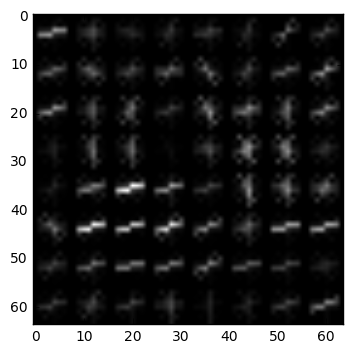

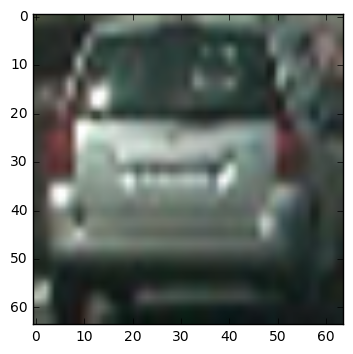

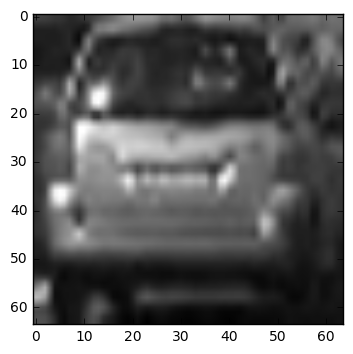

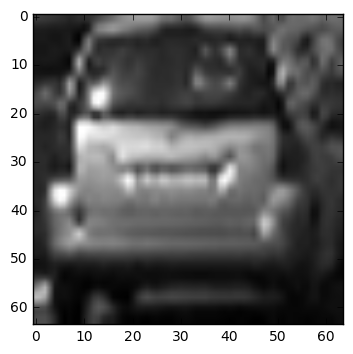

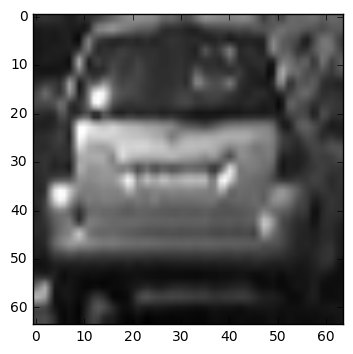

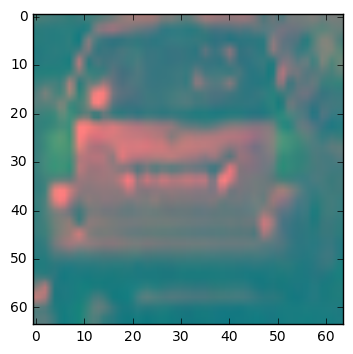

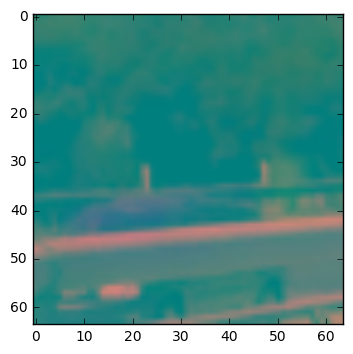

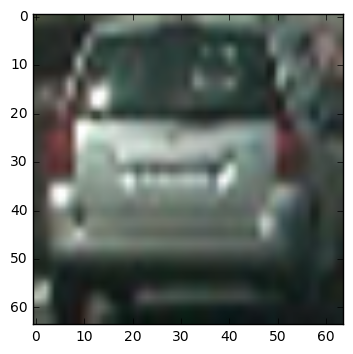

In [58]:

        
    # Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        feature_image=vehicledetect.convert_color(image,color_space)
        print(feature_image.shape)
        
        if spatial_feat == True:
            spatial_features = vehicledetect.bin_spatial(feature_image, size=spatial_size)
            print(spatial_features.shape)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = vehicledetect.color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(vehicledetect.get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                print(hog_features.shape)
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = vehicledetect.get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

#0.9809
if True:
        color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
        orient = 9  # HOG orientations
        pix_per_cell = 8 # HOG pixels per cell
        cell_per_block = 2 # HOG cells per block
        hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
        spatial_size = (16, 16) # Spatial binning dimensions
        hist_bins = 16    # Number of histogram bins
        spatial_feat = True # Spatial features on or off
        hist_feat = True # Histogram features on or off
        hog_feat = True # HOG features on or off

        car_img = mpimg.imread(cars[0])
        notcar_img = mpimg.imread(notcars[500])

        if True:
          for channel in range(0,3):
            print(car_img.shape)
            print(color_space)
            fi=convert_color(car_img,color_space)
            feat,img = vehicledetect.get_hog_features(fi[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=True, feature_vec=True)
            f, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))
            ax1.imshow(car_img[:,:,channel],cmap='gray')
            ax1.set_title('Car-ch-'+str(channel)+'', fontsize=30)
            ax2.imshow(img,cmap='gray')
            nfi=convert_color(notcar_img,color_space)
            feat,img = vehicledetect.get_hog_features(nfi[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=True, feature_vec=True)
            ax2.set_title('Car-ch-'+str(channel)+' HOG', fontsize=30)
            ax3.imshow(notcar_img[:,:,channel],cmap='gray')
            ax3.set_title('Car-ch-'+str(channel)+'', fontsize=30)
            ax4.imshow(img,cmap='gray')
            ax4.set_title('Car-ch-'+str(channel)+' HOG', fontsize=30)
            plt.show()
            
        plt.imshow(img,cmap='gray')
        plt.show()
        plt.imshow(car_img)
        plt.show()
        plt.imshow(car_img[:,:,0],cmap='gray')
        plt.show()
        plt.imshow(car_img[:,:,1],cmap='gray')
        plt.show()
        plt.imshow(car_img[:,:,2],cmap='gray')
        plt.show()

        plt.imshow(fi)
        plt.show()
        plt.imshow(nfi)
        plt.show()
        feature_image = np.copy(car_img)
        plt.imshow(feature_image)
        plt.show()

Test Accuracy of SVC =  0.9907


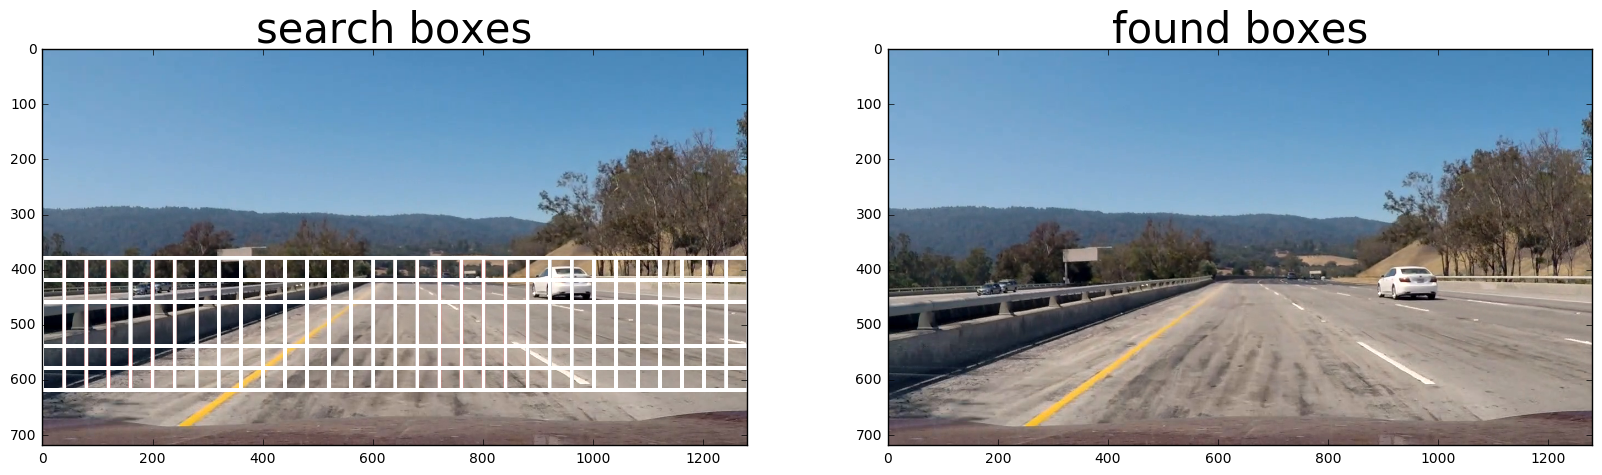

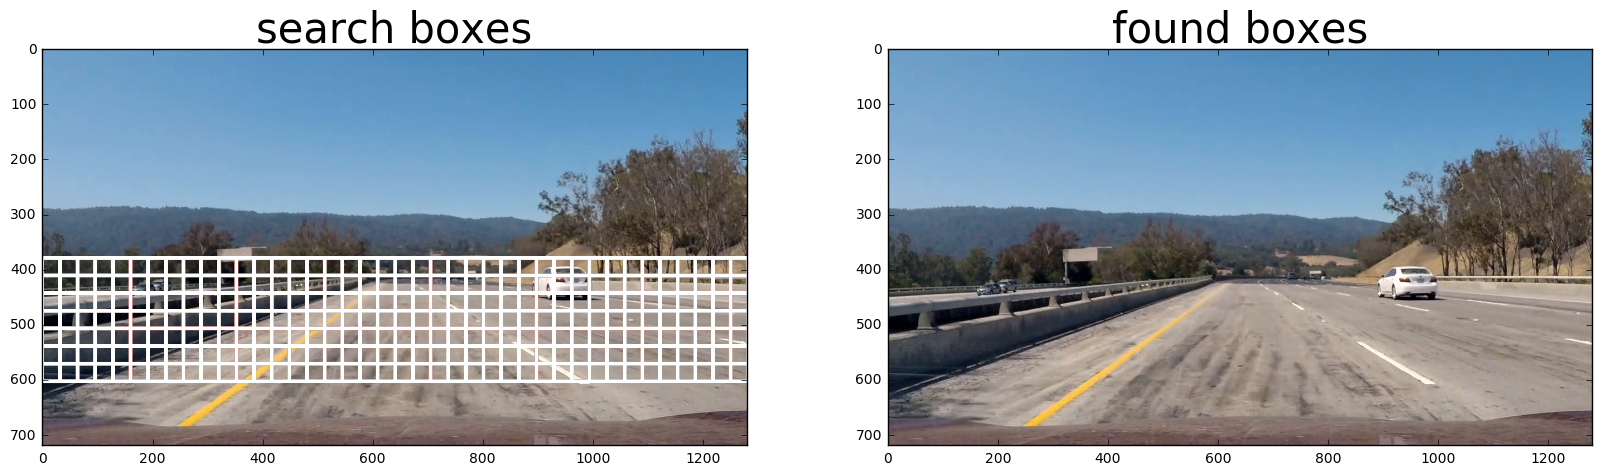

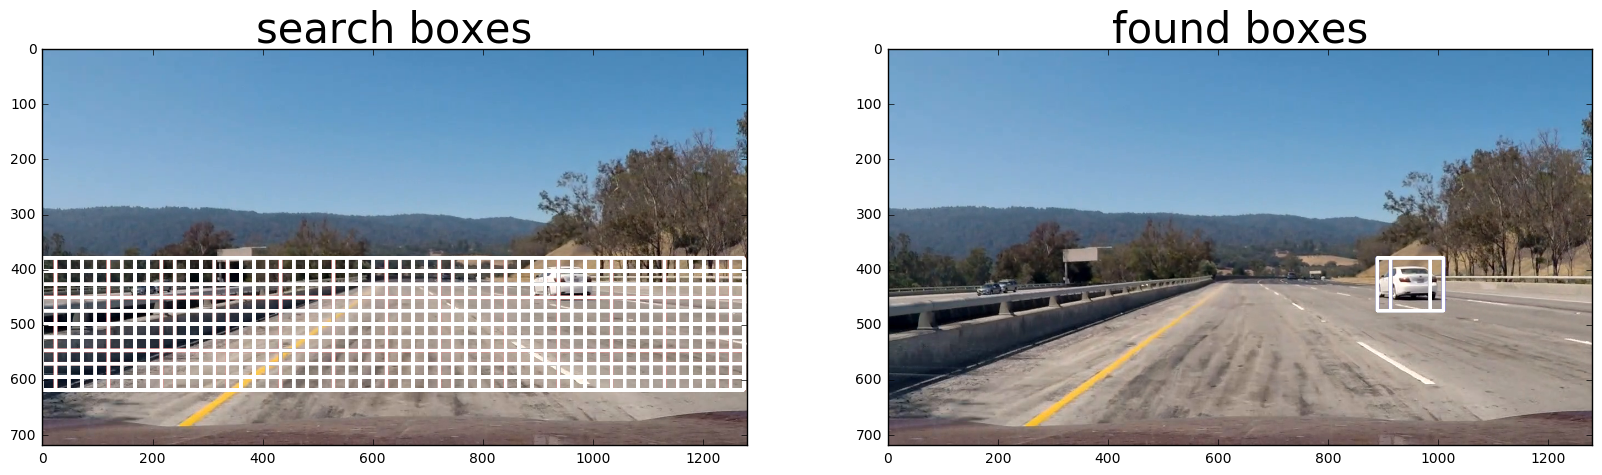

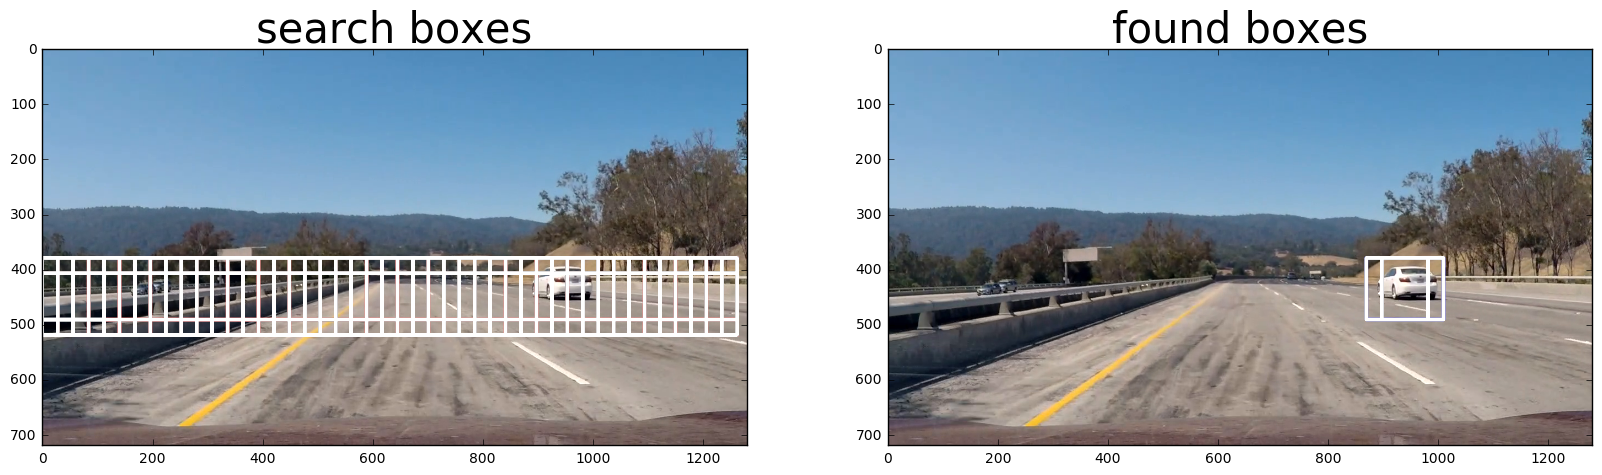

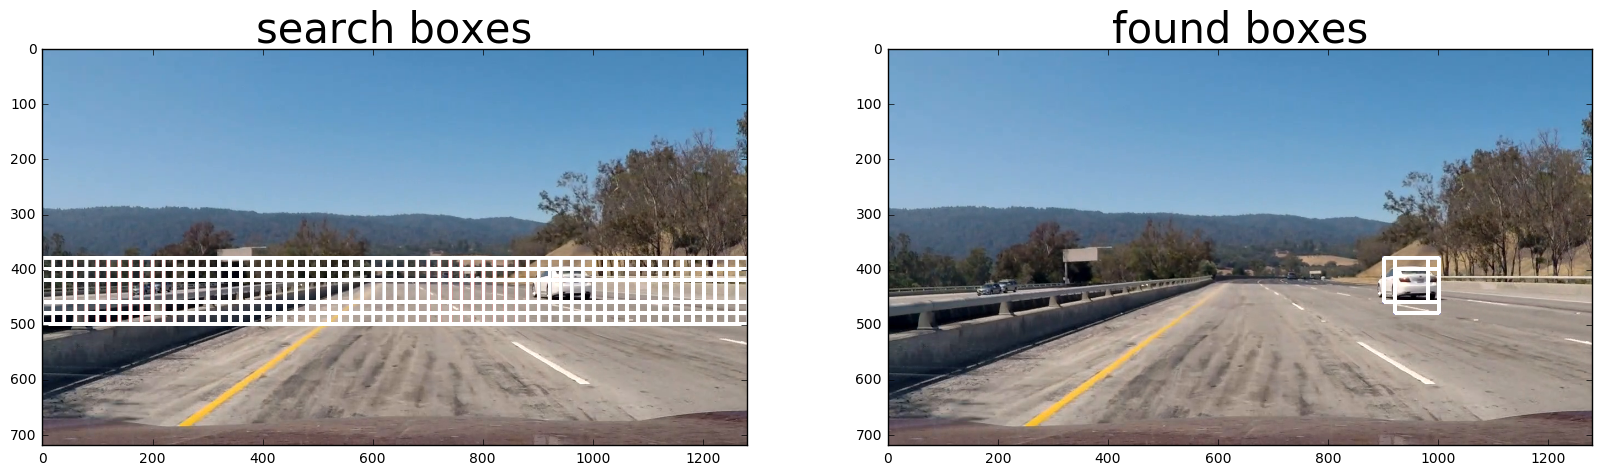

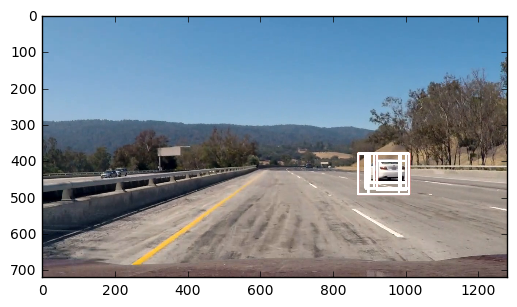

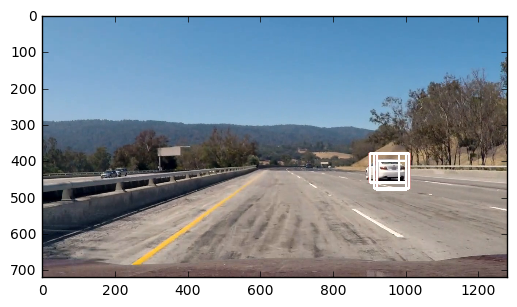

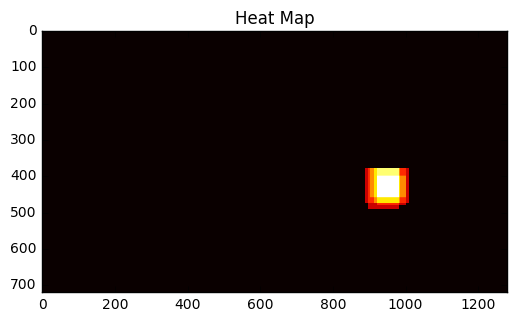

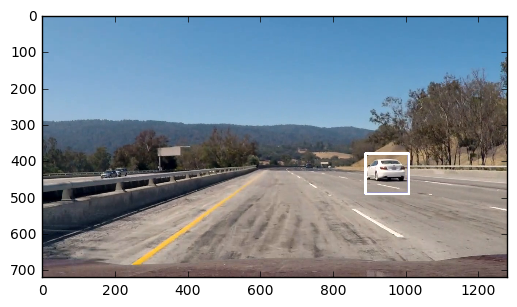

In [87]:
    dist_pickle = vehicledetect.loadModelPickle()
    svc = dist_pickle["svc"]
    X_scaler = dist_pickle["scaler"]
    orient = dist_pickle["orient"]
    pix_per_cell = dist_pickle["pix_per_cell"]
    cell_per_block = dist_pickle["cell_per_block"]
    spatial_size = dist_pickle["spatial_size"]
    hist_bins = dist_pickle["hist_bins"]
    color_space = dist_pickle["color_space"]
    accuracy_score = dist_pickle["accuracy_score"]
    print('Test Accuracy of SVC = ', round(accuracy_score, 4))
    
    test_images = ["output_images/proj"+str(560)+".png"]
    #test_images = ["output_images/proj"+str(1004)+".png"]
    #test_images = ['test_images/test5.jpg']
    image = mpimg.imread(test_images[0])
    if (image.dtype=='float32'):
        image = (image * 255).round().astype(np.uint8)

    find_car_params = [
     { "out_img": [] , "box_list":[], "decision_list":[], "debug_boxes":[], "ystart": 380, "yend": 660, "scale": 2.5},
     { "out_img": [] , "box_list":[], "decision_list":[], "debug_boxes":[], "ystart": 380, "yend": 656, "scale": 2},
     { "out_img": [] , "box_list":[], "decision_list":[], "debug_boxes":[], "ystart": 380, "yend": 656, "scale": 1.5},
     { "out_img": [] , "box_list":[], "decision_list":[], "debug_boxes":[], "ystart": 380, "yend": 550, "scale": 1.75},
     { "out_img": [] , "box_list":[], "decision_list":[], "debug_boxes":[], "ystart": 380, "yend": 530, "scale": 1.25}
 ]

    box_list=[]
    dec_list=[]
    debug_boxes=[]
    for fcp in find_car_params:
       fcp["out_img"], fcp["box_list"],fcp["decision_list"],fcp["debug_boxes"] = vehicledetect.find_cars(image, fcp["ystart"],fcp["yend"],fcp["scale"], svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins,color_space)
       box_list = box_list + fcp["box_list"]
       debug_boxes = debug_boxes + fcp["debug_boxes"]
       dec_list = dec_list+ fcp["decision_list"]
    #print(debug_boxes)
    
    for fcp in find_car_params:
        debug_box=fcp["debug_boxes"]
        debug_image=np.copy(image)
        vehicledetect.draw_bboxes(debug_image,debug_box)
        cv2.rectangle(debug_image, debug_box[0][0], debug_box[0][1], (255,255,255), 6)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        ax1.imshow(debug_image)
        ax1.set_title('search boxes', fontsize=30)
        out_img=fcp["out_img"]
        ax2.imshow(out_img)
        ax2.set_title('found boxes', fontsize=30)
        plt.show()

    debug_image=np.copy(image)
    vehicledetect.draw_bboxes(debug_image,box_list)
    plt.imshow(debug_image)
    plt.show()

    
    box_list_trunc=[]

    i=0
    for bbox in box_list:
            cropped = image[bbox[0][1]:bbox[1][1], bbox[0][0]:bbox[1][0]]
            canny = cv2.Canny(cropped,128,255)
            #im2, contours, hierarchy = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
            #areas = [cv2.contourArea(c) for c in contours]
            #max_index = np.argmax(areas)
            #cnt=contours[max_index]
            #x,y,w,h = cv2.boundingRect(cnt)
            #cv2.rectangle(cropped,(x,y),(x+w,y+h),(0,255,255),2)
            nz=np.count_nonzero(canny)
            px=canny.shape[0]*canny.shape[1]
            pc=nz/px*1.
            PCS=""
            if (pc>0.06): PCS="*"
            decs=""
            if (dec_list[i]>0.75): decs="*"
            if False:
                print('decision:',dec_list[i],decs,' pc:',pc,PCS)
                decs=""
                plt.imshow(cropped)
                plt.show()
                #plt.imshow(canny)
                #plt.show()
                #plt.imshow(im2)
                #plt.show()

            if (pc>0.06 and dec_list[i]>0.75):
            #if (pc>0.06 and dec_list[i]>0.5):
            #if (pc>0.09):
                box_list_trunc.append(bbox)
            i=i+1
    debug_image=np.copy(image)
    vehicledetect.draw_bboxes(debug_image,box_list_trunc)
    plt.imshow(debug_image)
    plt.show()
    
    
    #print(box_list)
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = vehicledetect.add_heat(heat,box_list)
    # Apply threshold to help remove false positives
    heat = vehicledetect.apply_threshold(heat,1)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    labels = label(heatmap)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heat Map')
    plt.show()
    draw_img = vehicledetect.draw_labeled_bboxes(np.copy(image), labels)
    plt.imshow(draw_img)
    plt.show()
